In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";")

In [3]:
customer_data.head()

,Unnamed: 0,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,...,7.0,3,0,1,4,0,1,1,0,0
1,1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,3,0,2,4,0,1,1,0,0
3,3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,...,7.0,1,0,1,4,0,1,0,1,0
4,4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,...,3.0,1,0,1,3,0,1,0,0,1


In [4]:
# Getting the name of the extra column
extra_col = list(general_data.columns)[0]
print(extra_col)

# Removing the extra column in every dataframe since it is redundant
general_data.drop(extra_col, axis=1, inplace=True)
customer_data.drop(extra_col, axis=1, inplace=True)
train_data.drop(extra_col, axis=1, inplace=True)
test_data.drop(extra_col, axis=1, inplace=True)

Unnamed: 0


In [5]:
customer_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,...,7.0,3,0,1,4,0,1,1,0,0
1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,0.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3,0,2,4,0,1,1,0,0
3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,7.0,1,0,1,4,0,1,0,1,0
4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,0.0,...,3.0,1,0,1,3,0,1,0,0,1


In [11]:
# Normalzing the data so that every column is on a 0 to 1 scale

# Importing the scaler
from sklearn.preprocessing import MinMaxScaler

# Creating the scaler
scaler = MinMaxScaler()

# Fitting the scaler to the customer data and transforming
customer_data_scaled = scaler.fit_transform(customer_data)

In [12]:
# import the PCA class from scikit learn
from sklearn.decomposition import PCA

# Defining the maximum number of principal components to fit the model
num_components = len(list(customer_data.columns)) - 1

# Creating a PCA model
pca = PCA(n_components=num_components)

# Fitting the PCA model
pca.fit(customer_data_scaled)

PCA(n_components=363)

In [8]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[5.50444166e-01 4.13043542e-02 2.44893077e-02 1.95814997e-02
 1.68829647e-02 1.52744762e-02 1.38610803e-02 1.07930161e-02
 9.96348166e-03 8.64273966e-03 7.85144270e-03 7.46544275e-03
 7.25089390e-03 5.40795060e-03 5.23551043e-03 4.86095110e-03
 4.65122892e-03 4.19547966e-03 4.01260790e-03 3.94345652e-03
 3.82477934e-03 3.78297882e-03 3.67448924e-03 3.60491687e-03
 3.55511107e-03 3.53368142e-03 3.46140981e-03 3.43533795e-03
 3.32341535e-03 3.26013278e-03 3.22219077e-03 3.11569910e-03
 3.04040447e-03 2.90129704e-03 2.75693114e-03 2.70701525e-03
 2.63779741e-03 2.62022772e-03 2.55234215e-03 2.49869568e-03
 2.45067666e-03 2.42886444e-03 2.36598744e-03 2.32454376e-03
 2.29541145e-03 2.27781924e-03 2.22781028e-03 2.20845930e-03
 2.17455567e-03 2.15014798e-03 2.11656893e-03 2.09935817e-03
 2.07032699e-03 2.00577588e-03 1.93197990e-03 1.90023139e-03
 1.88952641e-03 1.83282127e-03 1.81903803e-03 1.77718764e-03
 1.74807615e-03 1.73309576e-03 1.71643709e-03 1.67482060e-03
 1.66731654e-03 1.647914

In [19]:
def create_variance_plot(explained_var_ratio, num_components):
    """
    Creates a graph that shows the explained variance as a function of the number of principal components
    param explained_var_ratio: A list that holds the explained variance ratio for each component
    param num_components: An integer that specifies that number of components to display in the graph
    return: Use plt.show() to display the graph
    """
    # Getting an array of the cumulative sum of explained variance ratios in order to visualize the number of components needed
    explained_var_cumulative = np.cumsum(explained_var_ratio)
    
    # Creating the x-axis for the plot of the explained variance over the number of components plot
    x_axis = [*range(1, len(explained_var_cumulative)+1)]

    # Graphing the distribution of the RESPONSE variable for the training data
    plt.figure(figsize=(8.4, 6.8))
    ax = plt.gca()
    ax.set_facecolor('#ebedf0')
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    # Creating the plot for the explained variance over the number of components plot
    plt.plot(x_axis[:num_components], explained_var_cumulative[:num_components])
    # Adding a title
    plt.title("Explained Variance vs Number of Principal Components")
    # Adding the x-axis label
    plt.xlabel("Number of Principal Components")
    # Adding the y-axis label
    plt.ylabel("Cumulative Variance")

    plt.savefig('images/variance_plot')

    # Displaying the graph
    plt.show()
    

    return explained_var_cumulative

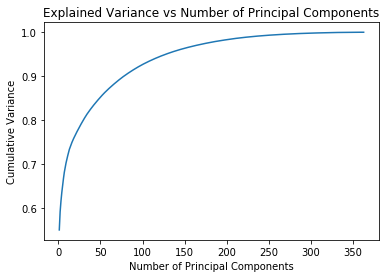

In [10]:
# Creating a plot for explained variance vs the number of principal components for all the components
explained_var = create_variance_plot(explained_variance_ratio, len(explained_variance_ratio))

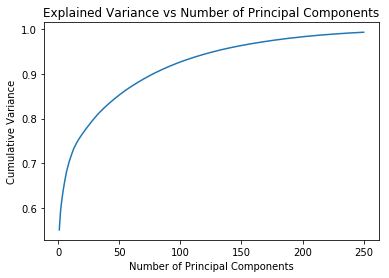

In [11]:
# Creating a plot for explained variance vs the number of principal components for the first 250 components
explained_var = create_variance_plot(explained_variance_ratio, 250)

In [12]:
print(explained_var[100])

0.9276566172565575


In [23]:
# Reducing the dimensionality of the data using 100 principal components
pca_100 = PCA(n_components=100)
customer_data_reduced = pca_100.fit_transform(customer_data_scaled)

In [24]:
print(customer_data_reduced[:5])

[[-2.75071432e+00 -6.92718941e-01 -1.74063368e+00 -8.75257094e-01
   5.71775732e-04 -1.09383607e-01  3.69810228e-01 -1.31929403e-01
  -3.26691903e-01  2.35874677e-01 -1.25480737e-01 -1.51619150e-01
  -6.98470974e-02 -3.27416421e-01  1.39521652e-01  2.33147166e-01
  -8.70699664e-02  2.78940428e-01 -4.39482861e-02  2.86422288e-01
  -1.65252147e-02 -3.39260769e-01  8.52766820e-01  3.85807540e-01
  -5.59552432e-01  3.18618718e-01  4.05994056e-01  5.45458851e-02
   6.02286191e-01 -2.45442526e-01  7.33338716e-02 -3.94807305e-01
   3.20268265e-01 -2.79691402e-01  1.83309805e-01 -1.62846329e-02
   1.65550929e-01 -1.67104968e-01 -3.22185664e-01 -3.06477104e-02
   7.03056130e-02 -2.23735957e-01 -3.37618808e-01  3.61153741e-01
  -1.13848321e-01 -9.54594262e-02 -9.40706741e-02  4.60691799e-01
  -7.42057111e-02 -2.22923807e-01 -2.32733714e-01 -4.88852266e-01
   1.51685916e-01  1.02792656e-01 -6.07952411e-02  2.52289329e-01
  -1.83703725e-02  1.23234969e-01 -1.81498982e-01 -9.36850175e-02
   7.15557

In [25]:
# Creating a dataframe that contains the correlations between a principal component and the features
component_makeup = pd.DataFrame(pca_100.components_, columns=customer_data.columns, index=[*range(1, 101)])

In [26]:
component_makeup.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
1,-0.044594,-0.026172,-0.057100,-0.041956,-0.001071,-0.004521,-0.012495,-0.015286,-0.001427,-0.016825,...,-0.054928,0.014436,0.001432,0.020589,-0.022353,0.005294,-0.005294,-0.004841,0.001973,0.002868
2,-0.018117,-0.017216,0.106122,0.052779,-0.004998,-0.001700,0.011479,0.029008,-0.006702,0.001614,...,0.012545,-0.058994,0.035149,-0.081514,-0.008518,0.061763,-0.061763,-0.067829,0.023568,0.044261
3,-0.049967,0.025582,0.028594,0.037740,0.004469,0.001085,0.004351,-0.005891,0.005697,-0.001071,...,0.006045,0.079402,0.035353,0.258127,-0.016505,0.355675,-0.355675,-0.365957,0.119672,0.246285
4,-0.032038,0.025994,0.037750,0.032068,0.005937,0.002099,0.006617,0.002001,0.007631,0.001824,...,-0.034338,0.063130,0.039176,0.114526,-0.017882,-0.355886,0.355886,0.370265,-0.147771,-0.222494
5,0.074667,-0.001707,-0.016863,-0.011198,0.003956,0.002671,-0.004644,0.000934,0.005173,0.003897,...,-0.140066,-0.024910,0.005643,-0.142001,0.006868,0.103599,-0.103599,-0.126803,0.121452,0.005351


In [27]:
# Making sure all 100 principal components are in the dataframe
len(component_makeup.index)

100

In [18]:
# Finding the most influential features of every principal component

# Dictionary that will hold the names of the most important features for every principal component
important_features_dict = {}

# Counter for the row index
i = 1
# Iterate through all the principal components
for i in range(1, 101):
    # Adding a key for the principal component
    new_key = "PC" + str(i)
    # Creating an empty list for the component
    important_features_dict[new_key] = []
    # Iterate through all the columns
    for feature in component_makeup.columns:
        # Add the name of the column and correlation coefficient if there is a strong correlation
        if component_makeup.loc[i, feature] >= 0.2 or component_makeup.loc[i, feature] <= -0.2:
            important_features_dict[new_key].append((feature, component_makeup.loc[i, feature]))

In [19]:
print(important_features_dict)

{'PC1': [], 'PC2': [('D19_GESAMT_ONLINE_QUOTE_12', 0.20151695032740602)], 'PC3': [('ANREDE_KZ', 0.2574145575956568), ('SINGLE_BUYER', 0.3539614557384421), ('MULTI_BUYER', -0.35396145573844207), ('COSMETIC_AND_FOOD', -0.364140084944719), ('FOOD', 0.24518237059189552)], 'PC4': [('SINGLE_BUYER', -0.3574913574416077), ('MULTI_BUYER', 0.3574913574416077), ('COSMETIC_AND_FOOD', 0.37188349286096295), ('FOOD', -0.22360191817813552)], 'PC5': [('GREEN_AVANTGARDE', 0.2337613404989215)], 'PC6': [('SEMIO_ERL', 0.21597830903283072), ('SEMIO_FAM', -0.21518003903782743), ('SEMIO_KULT', -0.24220199802228795), ('ANREDE_KZ', 0.4136964193902591)], 'PC7': [('ANREDE_KZ', 0.24061064303147575)], 'PC8': [], 'PC9': [('D19_GESAMT_ONLINE_QUOTE_12', -0.2011307859047984), ('LP_FAMILIE_FEIN', 0.38092757172849395), ('LP_FAMILIE_GROB', 0.3314294985579018), ('LP_LEBENSPHASE_FEIN', 0.30848737175804714), ('LP_LEBENSPHASE_GROB', 0.3280559102469748)], 'PC10': [('LP_LEBENSPHASE_FEIN', -0.2077459670055214), ('LP_LEBENSPHASE_

In [21]:
# Importing the K means model
from sklearn.cluster import MiniBatchKMeans


def find_optimal_k(data, num_clusters):
    """
    Creates a graph of the cumulative distortion of a k-means clustering model as a function of the number of clusters
    param data: A dataframe or numpy array with features
    param num_clusters: An integer that specifies the number of clusters that will be shown in the graph
    return: Uses plt.show() to display the graph
    """
    # For storing the distortion, the sum of squared distances of samples to their closest cluster center, for each iterations
    distortions = []
    
    # Trying different values for k, between 1 and num_clusters
    for k in range(1, num_clusters):
        # Defining a k means model with the value of k for the iteration and with 100 iterations max
        kmeans = MiniBatchKMeans(n_clusters=k, 
                        max_iter=100)
    
        # Fitting the k means model to the dimensionality reduced customer data
        kmeans.fit(data)
    
        # Appending the distortion value to the list
        distortions.append(kmeans.inertia_)
        
    # Creating a graph of the cumulative distortion as a function of the number of components
    plt.figure(figsize=(8.4, 6.8))
    ax = plt.gca()
    ax.set_facecolor('#ebedf0')
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.plot(distortions)
    # Adding a title
    plt.title("Inertia vs The Number of Clusters")
    # Adding a label for the x-axis
    plt.xlabel("Number of Clusters")
    # Adding a label for the y-axis
    plt.ylabel("Inertia")

    plt.savefig('images/distortion_plot')
    
    # Displaying the graph
    plt.show()

In [22]:
# Creating a graph that shows the cumulative distortion as a function of the number of clusters in order to find the optimal value for k
find_optimal_k(customer_data_reduced, 100)

NameError: name 'customer_data_reduced' is not defined

In [13]:
# Test using a PCA model with the unnormalized data

# Defining the maximum number of principal components to fit the model
num_components = len(list(customer_data.columns)) - 1

# Creating a PCA model
pca = PCA(n_components=num_components)

# Fitting the PCA model
pca.fit(customer_data)

PCA(n_components=363)

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[7.67176584e-01 1.87255103e-01 3.25981965e-02 1.23008299e-02
 1.50010254e-04 1.20512287e-04 7.15749937e-05 4.83518885e-05
 3.75139797e-05 2.37736421e-05 2.22601777e-05 1.38017251e-05
 1.00980830e-05 5.78538669e-06 5.68434264e-06 5.16114017e-06
 4.70082322e-06 4.19991351e-06 3.99423322e-06 3.81297588e-06
 3.68348386e-06 2.90536591e-06 2.83277870e-06 2.52454409e-06
 2.44774383e-06 2.35253025e-06 2.19581857e-06 2.12805713e-06
 2.09773823e-06 2.05485929e-06 2.02061495e-06 2.00621115e-06
 1.91800064e-06 1.90156446e-06 1.87237420e-06 1.83518456e-06
 1.75749558e-06 1.75110099e-06 1.69760828e-06 1.65585555e-06
 1.58901377e-06 1.56699533e-06 1.53013509e-06 1.48636186e-06
 1.47130103e-06 1.43868417e-06 1.39294541e-06 1.37074574e-06
 1.33132016e-06 1.30061841e-06 1.28434024e-06 1.26402263e-06
 1.22218713e-06 1.20634592e-06 1.15691872e-06 1.14044011e-06
 1.08778390e-06 1.06100815e-06 1.04595225e-06 9.89539309e-07
 9.85852576e-07 9.70356030e-07 9.48150640e-07 9.38712153e-07
 9.20433146e-07 9.171822

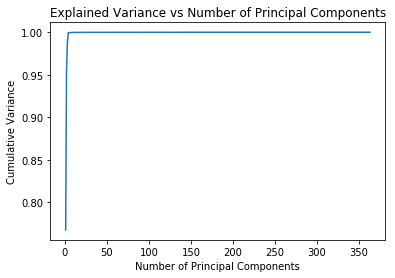

array([0.76733502, 0.95444679, 0.98702608, 0.99933112, 0.99948107,
       0.99960158, 0.99967306, 0.99972135, 0.99975883, 0.9997826 ,
       0.99980484, 0.99981863, 0.99982873, 0.99983451, 0.99984019,
       0.99984534, 0.99985004, 0.99985424, 0.99985822, 0.99986203,
       0.99986571, 0.99986861, 0.99987144, 0.99987396, 0.99987641,
       0.99987876, 0.99988095, 0.99988308, 0.99988518, 0.99988723,
       0.99988925, 0.99989126, 0.99989317, 0.99989507, 0.99989694,
       0.99989878, 0.99990053, 0.99990228, 0.99990398, 0.99990563,
       0.99990722, 0.99990879, 0.99991032, 0.9999118 , 0.99991327,
       0.99991471, 0.9999161 , 0.99991747, 0.9999188 , 0.9999201 ,
       0.99992139, 0.99992265, 0.99992387, 0.99992508, 0.99992623,
       0.99992737, 0.99992846, 0.99992952, 0.99993057, 0.99993156,
       0.99993254, 0.99993351, 0.99993446, 0.9999354 , 0.99993632,
       0.99993723, 0.99993814, 0.99993903, 0.99993992, 0.9999408 ,
       0.99994165, 0.9999425 , 0.99994333, 0.99994415, 0.99994

In [23]:
# Creating a plot for explained variance vs the number of principal components for all components
create_variance_plot(explained_variance_ratio, len(explained_variance_ratio))

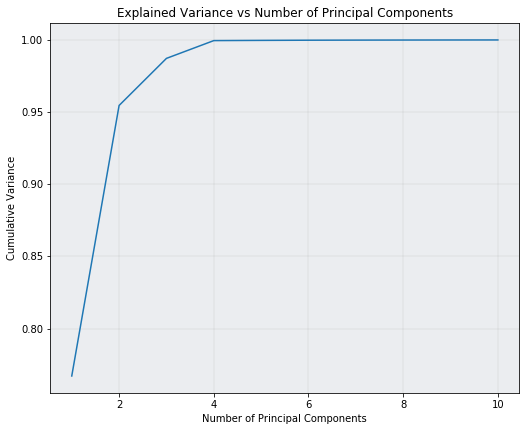

array([0.76717658, 0.95443169, 0.98702988, 0.99933071, 0.99948072,
       0.99960124, 0.99967281, 0.99972116, 0.99975868, 0.99978245,
       0.99980471, 0.99981851, 0.99982861, 0.9998344 , 0.99984008,
       0.99984524, 0.99984994, 0.99985414, 0.99985814, 0.99986195,
       0.99986563, 0.99986854, 0.99987137, 0.9998739 , 0.99987634,
       0.9998787 , 0.99988089, 0.99988302, 0.99988512, 0.99988717,
       0.99988919, 0.9998912 , 0.99989312, 0.99989502, 0.99989689,
       0.99989873, 0.99990048, 0.99990223, 0.99990393, 0.99990559,
       0.99990718, 0.99990874, 0.99991027, 0.99991176, 0.99991323,
       0.99991467, 0.99991606, 0.99991743, 0.99991877, 0.99992007,
       0.99992135, 0.99992261, 0.99992384, 0.99992504, 0.9999262 ,
       0.99992734, 0.99992843, 0.99992949, 0.99993053, 0.99993152,
       0.99993251, 0.99993348, 0.99993443, 0.99993537, 0.99993629,
       0.99993721, 0.99993811, 0.99993901, 0.99993989, 0.99994077,
       0.99994163, 0.99994247, 0.99994331, 0.99994412, 0.99994

In [20]:
# Creating a plot for explained variance vs the number of principal components for the first 10 components
create_variance_plot(explained_variance_ratio, 10)

In [25]:
explained_var[:10]

array([0.55044417, 0.59174852, 0.61623783, 0.63581933, 0.65270229,
       0.66797677, 0.68183785, 0.69263087, 0.70259435, 0.71123709])

In [26]:
# Reducing the dimensionality of the data to have 4 principal components

# Creating a PCA model with 4 principal components
pca = PCA(n_components=4)

# Fitting the PCA model
customer_data_reduced_4 = pca.fit_transform(customer_data)

In [27]:
# Creating a dataframe that contains the correlations between a principal component and the features
component_makeup = pd.DataFrame(pca.components_, columns=customer_data.columns, index=[*range(1, 5)])

In [28]:
component_makeup.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
1,-0.000541,-0.000766,-0.003803,-0.003567,-0.001634,-0.000303,-0.000332,-0.000951,-0.001554,-0.000291,...,-0.001395,0.000170,-0.000002,0.000047,-0.000496,0.000008,-0.000008,-0.000007,0.000004,0.000002
2,0.000061,0.000561,0.000449,-0.000937,0.001563,0.000218,0.000150,0.000463,0.001552,0.000178,...,0.000835,-0.000177,-0.000035,-0.000073,0.000396,-0.000052,0.000052,0.000053,-0.000014,-0.000038
3,-0.000209,-0.000602,-0.000775,-0.000854,-0.003153,-0.000087,-0.000129,-0.000225,-0.002911,-0.000142,...,0.000576,-0.000387,0.000004,-0.000022,-0.000220,-0.000007,0.000007,0.000003,-0.000007,0.000003
4,0.000713,0.001027,0.003572,0.002638,-0.002726,-0.000379,0.000385,0.001095,-0.002527,0.000355,...,-0.001460,0.000530,-0.000003,-0.000071,0.000630,-0.000034,0.000034,0.000044,-0.000021,-0.000023


In [29]:
# Finding the most influential features of every principal component

# Dictionary that will hold the names of the most important features for every principal component
important_features_dict = {}

# Counter for the row index
i = 1
# Iterate through all the principal components
for i in range(1, 5):
    # Adding a key for the principal component
    new_key = "PC" + str(i)
    # Creating an empty list for the component
    important_features_dict[new_key] = []
    # Iterate through all the columns
    for feature in component_makeup.columns:
        # Add the name of the column and correlation coefficient if there is a strong correlation
        if component_makeup.loc[i, feature] >= 0.2 or component_makeup.loc[i, feature] <= -0.2:
            important_features_dict[new_key].append((feature, component_makeup.loc[i, feature]))

In [30]:
print(important_features_dict)

{'PC1': [('EINGEZOGENAM_HH_JAHR', -0.5705858446297307), ('GEBURTSJAHR', -0.5483833813896041), ('KBA13_ANZAHL_PKW', -0.20095104609047684), ('MIN_GEBAEUDEJAHR', -0.5768392379786956)], 'PC2': [('EINGEZOGENAM_HH_JAHR', 0.34332665363661685), ('GEBURTSJAHR', -0.8353791122580406), ('MIN_GEBAEUDEJAHR', 0.3996877280816066)], 'PC3': [('EINGEZOGENAM_HH_JAHR', -0.27591706165808405), ('KBA13_ANZAHL_PKW', 0.9570914797595232)], 'PC4': [('EINGEZOGENAM_HH_JAHR', 0.6928193421153951), ('MIN_GEBAEUDEJAHR', -0.7066321367269783)]}


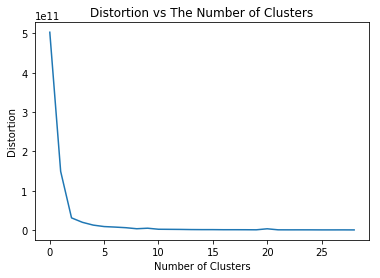

In [32]:
# Creating a graph that shows the cumulative distortion as a function of the number of clusters in order to find the optimal value for k
find_optimal_k(customer_data_reduced_4, 30)

In [31]:
# Training a k means clustering model with 4 clusters on the unnormalized data
kmeans = MiniBatchKMeans(n_clusters=4)

In [32]:
# Creating a dataframe that contains the cluster distances for each row
customer_cluster_distances = kmeans.fit_transform(customer_data_reduced_4)

# Getting the cluster predictions for each customer (cluster indices)
customer_clusters = kmeans.predict(customer_data_reduced_4)

In [33]:
# Converting the customer_cluster_distances numpy array to a pandas dataframe
customer_cluster_distances = pd.DataFrame(customer_cluster_distances)

In [34]:
# Combining the cluster distances dataframe with the cluster indices for each customer
customers_transformed = customer_cluster_distances.copy()
customers_transformed["labels"] = customer_clusters

In [35]:
customers_transformed.head()

,0,1,2,3,labels
0,1959.633686,3042.195759,537.168428,2098.741726,2
1,2967.445411,1970.372212,2103.055329,2756.541684,1
2,2033.692453,2829.250440,231.220370,1953.106230,2
3,1966.790369,2896.647856,90.961910,1979.489572,2
4,496.523265,3453.469707,1965.845060,125.105870,3


In [36]:
# Changing the column names to correspond to the cluster numbers
customers_transformed.columns = ["1", "2", "3", "4", "labels"]

In [37]:
# Adding 1 to each of the cluster labels since they should start at 1
customers_transformed["labels"] = customers_transformed["labels"] + 1

In [38]:
customers_transformed.head()

,1,2,3,4,labels
0,1959.633686,3042.195759,537.168428,2098.741726,3
1,2967.445411,1970.372212,2103.055329,2756.541684,2
2,2033.692453,2829.250440,231.220370,1953.106230,3
3,1966.790369,2896.647856,90.961910,1979.489572,3
4,496.523265,3453.469707,1965.845060,125.105870,4


In [39]:
# Creating another dataframe that contains the centroid distances
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_)

In [40]:
cluster_centroids.head()

,0,1,2,3
0,-1201.817809,-334.648451,344.276323,15.126360
1,2342.484601,-334.737004,37.919222,-19.769240
2,-62.479048,1240.462022,-34.510897,21.343388
3,-1030.865239,-463.273777,-199.551738,4.204879


In [41]:
# Changing the column names to represent the principal components
cluster_centroids.columns = ["c_1", "c_2", "c_3", "c_4"]

In [42]:
cluster_centroids.head()

,c_1,c_2,c_3,c_4
0,-1201.817809,-334.648451,344.276323,15.126360
1,2342.484601,-334.737004,37.919222,-19.769240
2,-62.479048,1240.462022,-34.510897,21.343388
3,-1030.865239,-463.273777,-199.551738,4.204879


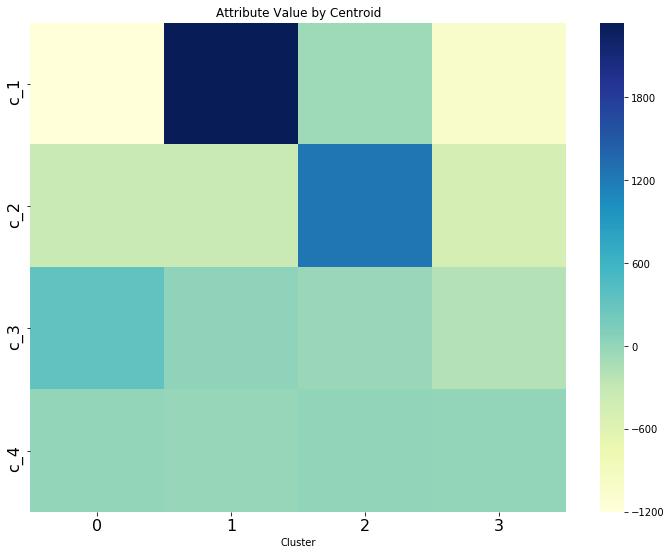

In [43]:
# Creating a heat map in order to visualize the clusters
plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_centroids.T, cmap = 'YlGnBu')
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")
plt.show()

(array([42419.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

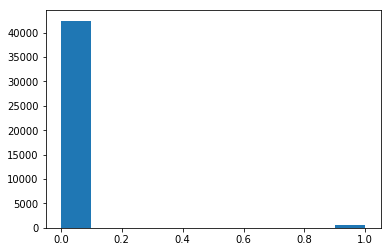

In [48]:
plt.hist(train_data["RESPONSE"])

In [51]:
len(train_data[train_data["RESPONSE"]==1]) / len(train_data)

0.01238620753882331

In [44]:
# Implementing random forest for dimensionality reduction since using PCA does not give accurate results

# Importing the random forest model from scikit learn
from sklearn.ensemble import RandomForestClassifier

# Creating the random forest model
rf_classifier = RandomForestClassifier(oob_score=True)

# Creating a feature matrix and label vector from the train data
X_train = train_data.loc[:, train_data.columns != 'RESPONSE']
y_train = train_data['RESPONSE']

# Training the model using the train_data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
feature_importances = rf_classifier.feature_importances_
feature_importances.sort()
print(feature_importances)

[0.00029296 0.00031663 0.00032947 0.00033262 0.00043197 0.00045262
 0.00049297 0.00057856 0.00059319 0.00065086 0.00066503 0.00066946
 0.00069619 0.00074469 0.00075388 0.0007853  0.00080694 0.00084449
 0.00087563 0.00087575 0.00093133 0.00096368 0.00096395 0.00099569
 0.00100593 0.00101053 0.0010488  0.00106299 0.001064   0.00106498
 0.00107823 0.00110422 0.00112748 0.00113597 0.00116838 0.00118603
 0.00120238 0.00121448 0.0012226  0.00126114 0.0012783  0.00129975
 0.00134959 0.00139113 0.00145599 0.00145646 0.00147634 0.00149205
 0.00150406 0.00154759 0.00154932 0.00155827 0.00157932 0.00158852
 0.00161055 0.0016311  0.0016373  0.00165598 0.00166496 0.0016866
 0.00170722 0.00171519 0.00172157 0.00175582 0.00175905 0.00176357
 0.00176772 0.00177116 0.00177786 0.00178517 0.00181647 0.00181827
 0.0018196  0.00182506 0.00188358 0.00190112 0.00190144 0.00191353
 0.0019344  0.00194946 0.00195729 0.00196511 0.00200724 0.00200909
 0.00202485 0.00207048 0.00208154 0.00209333 0.00210215 0.00210

In [46]:
print(rf_classifier.oob_score_)

0.9875905101161789


In [31]:
train_data['RESPONSE']

0        0
1        0
2        0
3        0
4        0
        ..
42946    0
42947    0
42948    0
42949    0
42950    0
Name: RESPONSE, Length: 42951, dtype: int64

In [36]:
X_train.shape

(42951, 358)

In [46]:
# Test
X_test = test_data.loc[:, test_data.columns != 'RESPONSE']



In [39]:
y_pred = rf_classifier.predict(X_train)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))

0.998463365230146


In [49]:
print(accuracy_score(y_train, rf_classifier.classes_))

NameError: name 'accuracy_score' is not defined

In [47]:
y_pred_2 = rf_classifier.predict(X_test)

In [48]:
from sklearn.model_selection import train_test_split
x1, x2, y1, y2 = train_test_split(X_train, y_train, test_size=0.1)

NameError: name 'X_train' is not defined